<a href="https://colab.research.google.com/github/smmurdock/Learn-TensorFlow/blob/main/01_neural_network_regression_with_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network Regression with TensorFlow

**Example Regression Problems:**

* How much will this house sell for?
* How many people will buy this app?
* How much will my health insurance be?
* How much should I save each week for fuel?

**What we're going to cover:**

* Architecture of a neural network regression model
* Input shapes and output shapes of a regression model (features and labels)
* Creating custom data to view and fit
* Steps in modeling
  * Creating a model
  * Compiling a model
  * Fitting a model
  * Evaluating a model
* Different evaluation methods
* Saving and loading models

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables.

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


## Creating data to view and fit

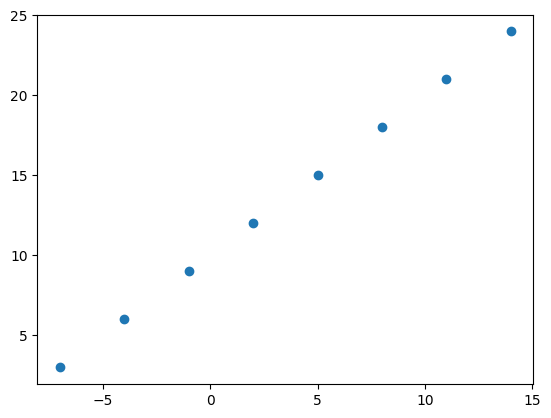

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [6]:
X[1], y[1]

(np.float64(-4.0), np.float64(6.0))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [10]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
# # Turn our NumPy arrays into tensors with dtype float32
# X = tf.constant(X)
# y = tf.constant(y)
# X, y

In [12]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

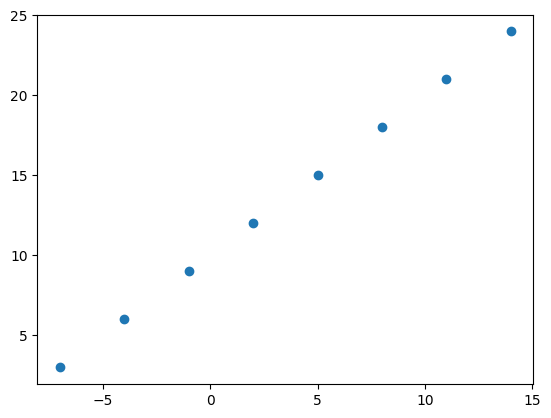

In [13]:
plt.scatter(X, y);

## Steps in Modeling with TensorFlow

1. **Creating a model** - define the input and output layers as well as the hidden layers of a neural network (if using a deep learning model).
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns it's learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [14]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step - loss: 11.2617 - mae: 11.2617
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 11.1292 - mae: 11.1292
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.9967 - mae: 10.9967
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.8642 - mae: 10.8642
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 10.7317 - mae: 10.7317


In [15]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [16]:
# Try and make a prediction using our model
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[13.8968315]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increasing the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

### Revised Steps in Modeling with TensorFlow
1. Construct or import a pretrained model relevant to your problem.
2. Compile the model (prepare it to be used with data)
  - **Loss** - how wrong your model's predictions are compared to the truth labels (you want to minimize this).
  - **Optimizer** - how your model should update its internal patterns to better its predictions.
  - **Metrics** - human interpretable values for how well your model is doing.
3. Fit the model to the training data so it can discover patterns.
  - **Epochs** - how many times the model will go through all of the training examples.
4. Evaluate the model on the test data (how reliable are our model's predictions?)

In [17]:
# Let's rebuild our model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 17.6103 - mae: 17.6103
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 17.3290 - mae: 17.3290
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 17.0478 - mae: 17.0478
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 16.7665 - mae: 16.7665
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 16.4853 - mae: 16.4853
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 16.2040 - mae: 16.2040
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 15.9228 - mae: 15.9228
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 15.6415 - mae: 15.6415
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 15.3603 - mae: 15.3603
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 15.0790 - mae: 15.0790
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 14.8277 - mae: 14.8277
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 14.6952 - mae: 14.6952
Epoch 13/100
1/1 ━━━━━━━

In [18]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [19]:
# Let's see if our model's prediction has improved
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[29.786922]], dtype=float32)

In [20]:
# Exercise: Select and use one hyperparameter from the example model on the
# slide to modify and test with our existing model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"), # change made here
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 614ms/step - loss: 11.4954 - mae: 11.4954
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.8867 - mae: 10.8867
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 10.2558 - mae: 10.2558
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.6037 - mae: 9.6037
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 8.9158 - mae: 8.9158
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.1861 - mae: 8.1861
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.4098 - mae: 7.4098
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 6.5831 - mae: 6.5831
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 5.6878 - mae: 5.6878
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.7214 - mae: 4.7214
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 4.3189 - mae: 4.3189
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 4.3406 - mae: 4.3406
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

In [21]:
# Let's see if our model's prediction has improved
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([[31.725584]], dtype=float32)

In [22]:
# Exercise: Select and use one hyperparameter from the example model on the
# slide to modify and test with our existing model

# Set random seed
tf.random.set_seed(42)

#1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # change made here
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step - loss: 12.8370 - mae: 12.8370
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 12.0941 - mae: 12.0941
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 11.3498 - mae: 11.3498
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 10.6024 - mae: 10.6024
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.8502 - mae: 9.8502
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 9.0908 - mae: 9.0908
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.3217 - mae: 8.3217
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.5406 - mae: 7.5406
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6.8491 - mae: 6.8491
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6.8631 - mae: 6.8631
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.1428 - mae: 7.1428
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 7.3030 - mae: 7.3030
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

In [23]:
# Let's see if our model's prediction has improved
y_pred = model.predict(tf.expand_dims(tf.constant([17.0]), axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


array([[27.031677]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:

* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [24]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

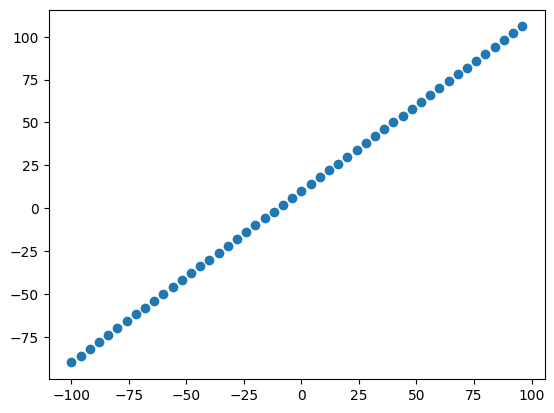

In [26]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data you have available. (not always used)
* **Test set** - the model gets evaluated on this data to test what it has learned, which is typically 10-15% of the total data you have available.

**Generalization** - the ability of a machine learning model to perform well on data it hasn't seen before.

In [27]:
# Check the length of how many samples we have
len(X)

50

**Note:** This is a small sample in the world of machine learning.

In [28]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now that we've got our data in training and test sets, let's visualize it again.

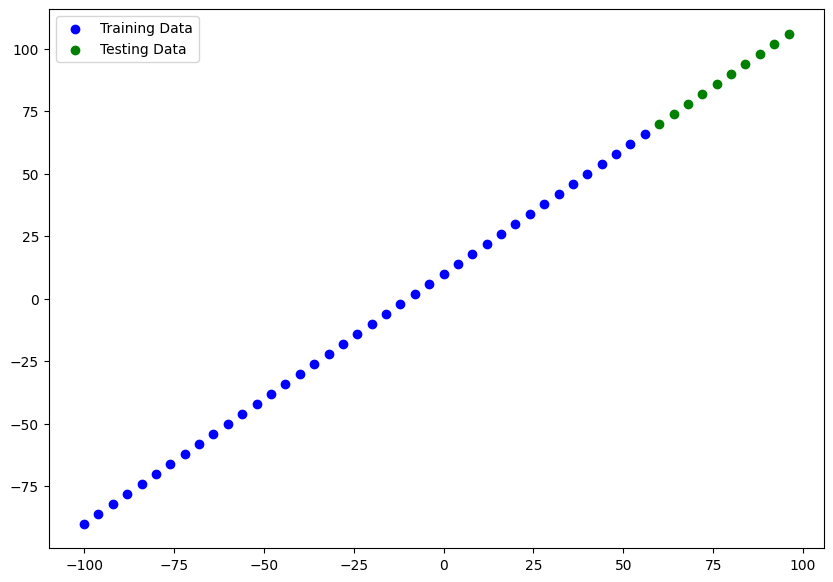

In [29]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing Data")
# Show a legend
plt.legend();

In [30]:
# Let's have a look at how to build a neural network using our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 11.0523 - mae: 11.0523
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 7.5845 - mae: 7.5845
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 8.6447 - mae: 8.6447
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 10.1135 - mae: 10.1135
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 11.8368 - mae: 11.8368
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 8.7545 - mae: 8.7545 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 10.2232 - mae: 10.2232 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 11.9939 - mae: 11.9939
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 12.6570 - mae: 12.6570
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.1513 - mae: 8.1513
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.8120 - mae: 8.8120
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.7481 - mae: 7.7481
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━

### Visualizing the model

In [31]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [33]:
# Let's create a model that builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile a model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# # 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [34]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params** - the total number of parameters in the model.
* **Trainable params** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable params** - these paramters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://www.youtube.com/watch?v=alfdI7S6wCY&list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI&index=2)

⚒ **Exercise:** Try playing around with the number of hidden units in the dense layer. See how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [35]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [36]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

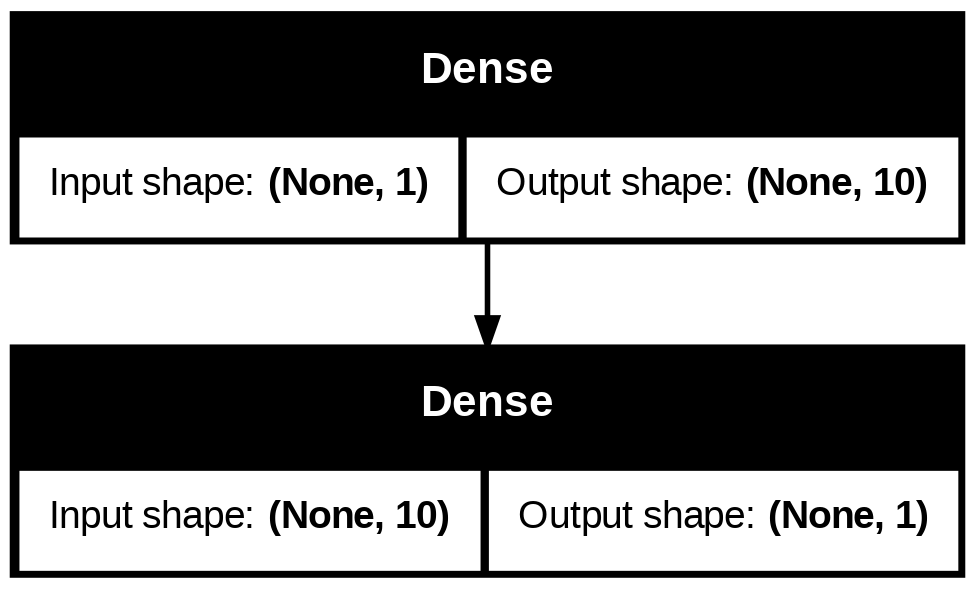

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often, you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [38]:
# Make some predictions
y_pred = model.predict(tf.expand_dims(X_test, axis=-1))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[ 69.68231 ],
       [ 73.63713 ],
       [ 77.59194 ],
       [ 81.546745],
       [ 85.501564],
       [ 89.456375],
       [ 93.41119 ],
       [ 97.36599 ],
       [101.32081 ],
       [105.27561 ]], dtype=float32)

In [39]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [40]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     training_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data, and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, training_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data", alpha=0.7)
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions", alpha=0.7)
    # Show the legend
    plt.legend()
    plt.show()

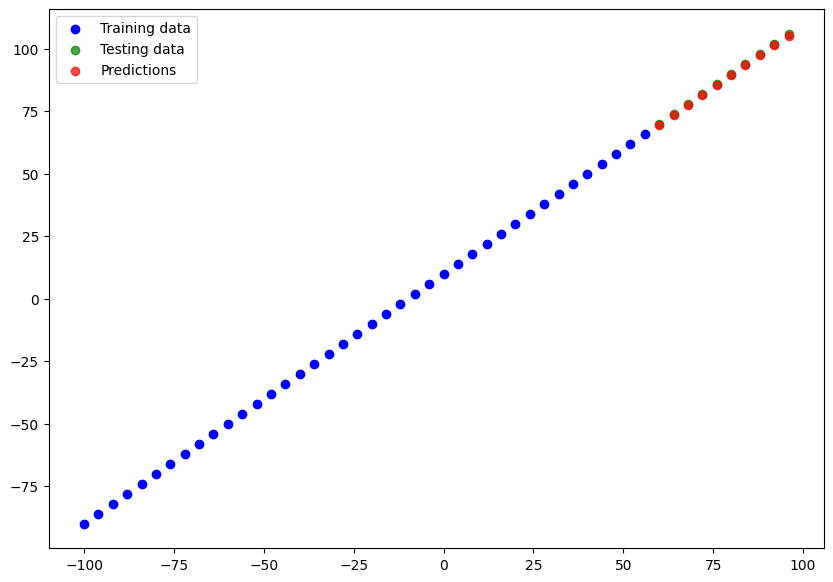

In [41]:
# Show the plot
plot_predictions(train_data=X_train,
                 training_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regreession, two of the main metrics:

* **MAE - mean absolute error** - on average, how wrong is each of my model's predictions
* **MSE - mean squared error** - square of the average errors


Metric Name | TensorFlow Code | When to use
:-- | :-- | :--
Mean Absolute Error (MAE) | `tf.keras.losses.MAE()` or `tf.metrics.MeanAbsoluteError()` | As a great starter metric for any regression problem.
Mean Square Error (MSE) | `tf.keras.losses.MSE()` or `tf.metrics.MeanSquaredError()` | When larger errors are more significant than smaller errors.
Huber | `tf.keras.losses.Huber()` | Combination of MSE and MAE. Less sensitive to outliers than MSE.

In [42]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - loss: 0.5210 - mae: 0.5210


[0.5210334658622742, 0.5210334658622742]

In [43]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.317688  , 0.36286926, 0.40805817, 0.4532547 , 0.49843597,
       0.5436249 , 0.5888138 , 0.6340103 , 0.6791916 , 0.7243881 ],
      dtype=float32)>

In [44]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.68231 ,  73.63713 ,  77.59194 ,  81.546745,  85.501564,
        89.456375,  93.41119 ,  97.36599 , 101.32081 , 105.27561 ],
      dtype=float32)>

In [45]:
# Calculate the mean absolute error
mae = tf.keras.metrics.MeanAbsoluteError()(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.5210334658622742>

In [46]:
# Calculate the mean square error
mse = tf.keras.losses.MSE(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=0.2883227467536926>

In [47]:
mse = tf.keras.metrics.MeanSquaredError()
mse(y_true=y_test, y_pred=tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.2883227467536926>

In [48]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    metric = tf.metrics.MeanAbsoluteError()
    metric.update_state(y_true, tf.squeeze(y_pred))
    return metric

def mse(y_true, y_pred):
    metric = tf.metrics.MeanSquaredError()
    metric.update_state(y_true, tf.squeeze(y_pred))
    return metric

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...

In [49]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modeling experiments:

1. `model_1` - the same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
4. `model_4` - 3 layers, trained for 100 epochs.
5. `model_5` - 3 layers, trained for 500 epochs.

#### Build `model_1`

In [50]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 12.2240 - mae: 12.2240 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 12.4398 - mae: 12.4398
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.3982 - mae: 8.3982
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.1367 - mae: 9.1367
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.2127 - mae: 8.2127
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 8.8758 - mae: 8.8758
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.8052 - mae: 7.8052
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.8024 - mae: 10.8024
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.6043 - mae: 7.6043
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.9785 - mae: 11.9785
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 8.1307 - mae: 8.1307 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 8.7873 - mae: 8.7873
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


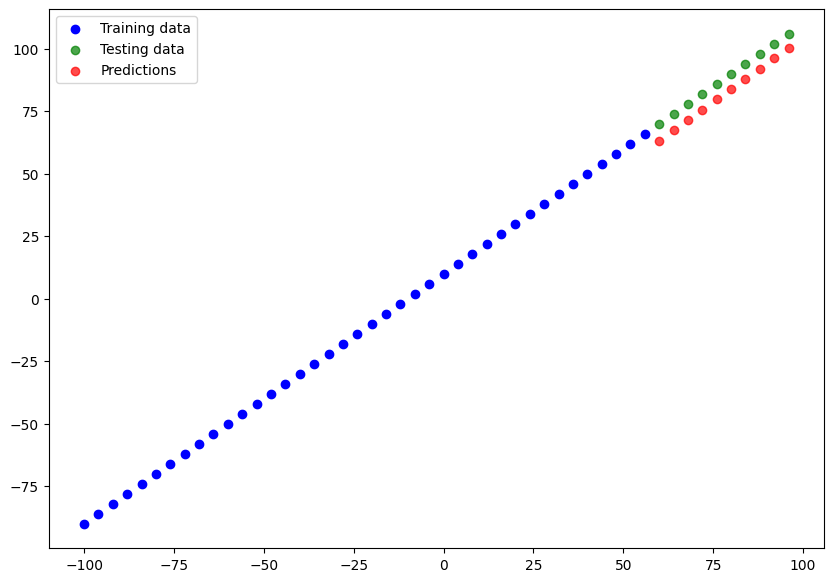

In [51]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_1)

In [52]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1).result()
mse_1 = mse(y_test, y_preds_1).result()
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=6.2008161544799805>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.57280349731445>)

#### Build `model_2`

In [53]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 53.2166 - mse: 4004.0684 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 38.4097 - mse: 2070.2947
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 26.5005 - mse: 956.3531 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 20.7124 - mse: 580.8244
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 18.2110 - mse: 451.2628
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 17.0670 - mse: 397.0957
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 16.7311 - mse: 378.9290
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 11.7841 - mse: 219.6365 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 14.6916 - mse: 301.8210
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 15.6031 - mse: 329.4728
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.7526 - mse: 213.4465
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 14.7369 - mse: 300.5929 
Epoch 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


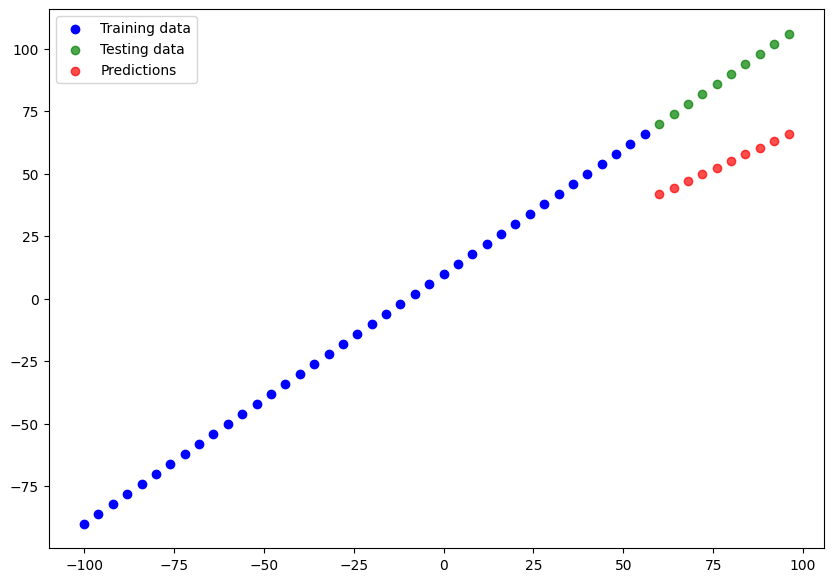

In [54]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_2)

In [55]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2).result()
mse_2 = mse(y_test, y_preds_2).result()
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=34.25275802612305>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1187.776611328125>)

#### Build `model_3`

In [56]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 17.0034 - mae: 17.0034 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 24.4792 - mae: 24.4792
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 22.2528 - mae: 22.2528
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 21.8917 - mae: 21.8917
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 19.0023 - mae: 19.0023
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 17.6433 - mae: 17.6433
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8973 - mae: 11.8973
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 14.5841 - mae: 14.5841
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 15.9336 - mae: 15.9336
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 11.8915 - mae: 11.8915
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 14.8586 - mae: 14.8586
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 10.9120 - mae: 10.9120
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


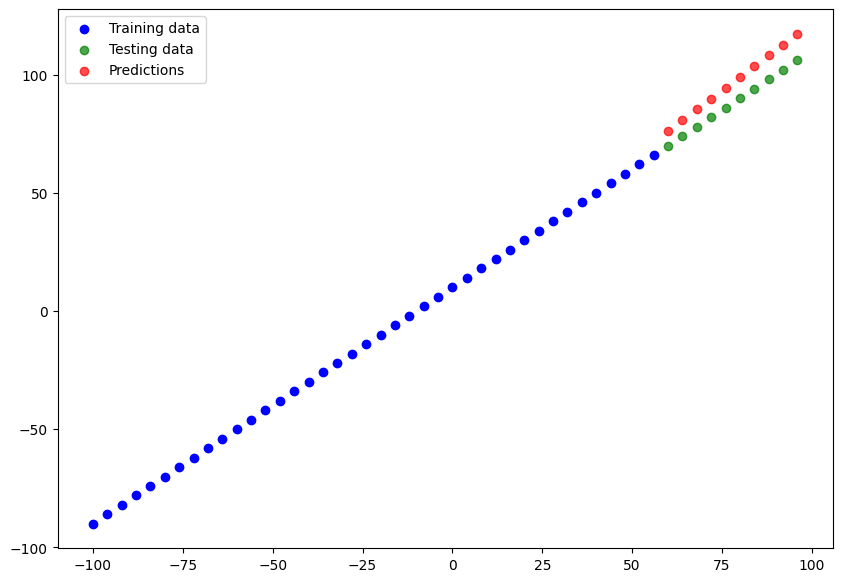

In [57]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_3)

In [58]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3).result()
mse_3 = mse(y_test, y_preds_3).result()
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=8.711943626403809>,
 <tf.Tensor: shape=(), dtype=float32, numpy=78.62749481201172>)

#### Build `model_4`

In [59]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 29.8433 - mse: 2734.0938
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 36.9822 - mse: 1849.5771
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 16.6258 - mse: 493.5289
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 30.5529 - mse: 1273.5132 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 13.7298 - mse: 246.3955
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 13.3008 - mse: 226.1493
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 13.0027 - mse: 213.3791
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.8032 - mse: 205.4023
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.6786 - mse: 200.6621
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 12.6111 - mse: 198.2253
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.5871 - mse: 197.5087
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 12.5960 - mse: 198.1300
Epoch 13/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


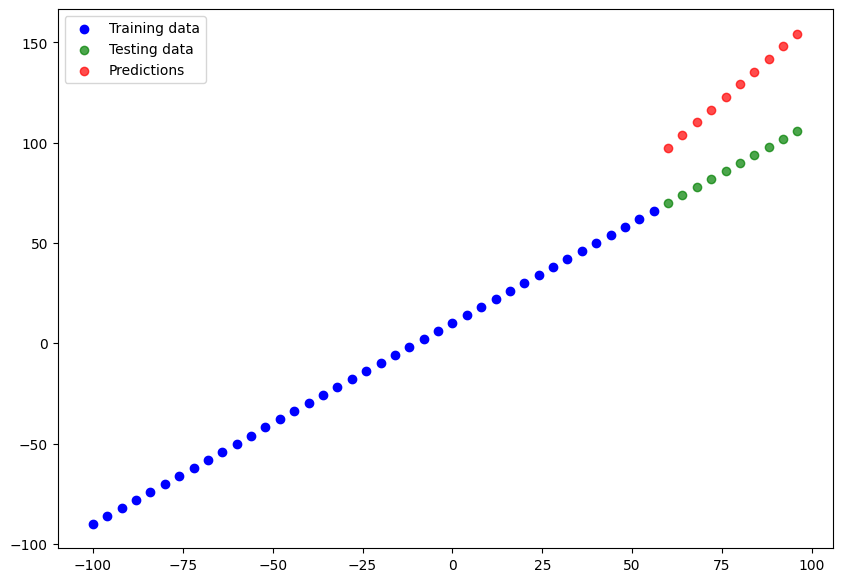

In [60]:
# Make and plot predictions for model_4
y_preds_4 = model_4.predict(tf.expand_dims(X_test, axis=-1))
plot_predictions(predictions=y_preds_4)

In [61]:
# Calculate model_4 evaluation metrics
mae_4 = mae(y_test, y_preds_4).result()
mse_4 = mse(y_test, y_preds_4).result()
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=37.88152313232422>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1478.750732421875>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results

We've run a few experiments, let's compare the results.

In [62]:
# Let's compare our model's using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()]]

all_model_results = pd.DataFrame(model_results,
                                  columns=["model", "mae", "mse"])
all_model_results

,model,mae,mse
0,model_1,6.200816,38.572803
1,model_2,34.252758,1187.776611
2,model_3,8.711944,78.627495
3,model_4,37.881523,1478.750732


Looks like `model_3` performed the best...

In [63]:
model_3.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "eperiment, experiment, experiment."

## Tracking your experiments

One really good habit in machine learning modeling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* [TensorBoard](https://www.tensorflow.org/tensorboard) - a component of the TensorFlow library to help track modeling experiments (we'll see this one later).
* [Weights & Biases](https://wandb.ai/site) - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or in a mobile app.

⚒ **Resource:** [TensorFlow Documentation: Save and load models](https://www.tensorflow.org/tutorials/keras/save_and_load)

There are three main formats we can save our model to:

1. The `.keras` format
2. The `SavedModel` format
3. The `HDF5` format

In [64]:
# Save model using the .keras format
model_3.save("best_model_Keras_format.keras")

In [65]:
# Save model using the HDF5 (.h5) format
model_3.save("best_model_HDF5_format.h5")

## Loading in a saved model

Besides being necessary when being used beyond the original file, it's a handy method for verifying that a model was saved properly.

⚒ **Resource:** [TensorFlow Documentation: Save and load models](https://www.tensorflow.org/tutorials/keras/save_and_load)

In [66]:
# Load in the Keras format model
loaded_Keras_format = tf.keras.models.load_model("/content/best_model_Keras_format.keras")
loaded_Keras_format.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [67]:
# Compare model_3 predictions with Keras format model predictions
model_3_preds = model_3.predict(tf.expand_dims(X_test, axis=-1))
loaded_Keras_format_preds = loaded_Keras_format.predict(tf.expand_dims(X_test, axis=-1))
model_3_preds == loaded_Keras_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [68]:
# Compare the MAE of model_3_preds and Keras loaded model preds
mae(y_true=y_test, y_pred=model_3_preds) == mae(y_true=y_test, y_pred=loaded_Keras_format_preds)

False

In [69]:
model_3_preds.squeeze() == loaded_Keras_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [70]:
# Load in the HDF5 format
loaded_HDF5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_HDF5_format.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [71]:
# Compare model_3 predictions model match_3
model_3_preds = model_3.predict(tf.expand_dims(X_test, axis=-1))
loaded_HDF5_format_preds = loaded_HDF5_format.predict(tf.expand_dims(X_test, axis=-1))
model_3_preds == loaded_HDF5_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [72]:
# Compare the MAE of model_3_preds and HDf5 loaded model preds
mae(y_true=y_test, y_pred=model_3_preds) == mae(y_true=y_test, y_pred=loaded_HDF5_format_preds)

False

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. Go to the Files tab and right-click on the file you're after and click Download.
2. Use code (see the cell below).
3. Save it to Google drive and copying it there (see 2nd code cell below)

In [73]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp "/content/best_model_HDF5_format.h5" "/content/drive/MyDrive/1 Projects/_ZTM TensorFlow Course"

In [75]:
!ls

best_model_HDF5_format.h5      drive	  sample_data
best_model_Keras_format.keras  model.png


## A larger example

**Note:** For (CSV) datasets on GitHub, visit the Raw version of the data and copy/paste the URL (<kbd>CMD + L</kbd>)

In [76]:
# Import the required libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [78]:
insurance["smoker"], insurance["age"]

(0       yes
 1        no
 2        no
 3        no
 4        no
        ... 
 1333     no
 1334     no
 1335     no
 1336     no
 1337    yes
 Name: smoker, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

[One-hot encoding in pandas](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html): `.get_dummies()`

In [81]:
# Let's one-hot encode our DataFrame to get all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [86]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [87]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [88]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [89]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [103]:
# Build a neural network (sort of like model_3 above)
tf.random.set_seed(42)

# 1. Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 13262.3809 - mae: 13262.3809
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12411.3252 - mae: 12411.3252
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12142.8271 - mae: 12142.8271
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12073.5723 - mae: 12073.5723
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11972.7764 - mae: 11972.7764
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11809.1406 - mae: 11809.1406
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11529.3682 - mae: 11529.3682
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11067.3867 - mae: 11067.3867
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10470.4053 - mae: 10470.4053
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9845.9824 - mae: 9845.9824
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9288.5352 - mae: 9288.5352
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━

In [104]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8872.3672 - mae: 8872.3672  


[8680.6982421875, 8680.6982421875]

In [105]:
y_train

,charges
560,9193.83850
1285,8534.67180
1142,27117.99378
969,8596.82780
486,12475.35130
...,...
1095,4561.18850
1130,8582.30230
1294,11931.12525
860,46113.51100


In [106]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

If our model is off on average by 8872, that's pretty substantial.

Right now, it looks like our model isn't performing too well. We'll try to improve it.

To (try to) improve our model, we'll try two experiments:

1. Add an extra layer with more hidden units and use the Adam optimizer
2. Train for longer

In [110]:
# Try to improve the model by adding an extra layer
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13293.3320 - mae: 13293.3320
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13273.2803 - mae: 13273.2803
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13237.1748 - mae: 13237.1748
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13169.4092 - mae: 13169.4092
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13052.9639 - mae: 13052.9639
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12874.8506 - mae: 12874.8506
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12640.3311 - mae: 12640.3311
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12379.6797 - mae: 12379.6797
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12162.1416 - mae: 12162.1416
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12070.0898 - mae: 12070.0898
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12042.9746 - mae: 12042.9746
Epoch 12/100
34/34 ━━━━━━━━━━━

In [111]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8770.9863 - mae: 8770.9863  


[8619.90625, 8619.90625]

In [112]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8872.3672 - mae: 8872.3672 


[8680.6982421875, 8680.6982421875]

In [121]:
# Try to improve the model by adding an extra layer
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 13196.8418 - mae: 13196.8418
Epoch 2/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12134.4580 - mae: 12134.4580
Epoch 3/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11806.7383 - mae: 11806.7383
Epoch 4/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11109.8857 - mae: 11109.8857
Epoch 5/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9450.1035 - mae: 9450.1035
Epoch 6/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8280.3076 - mae: 8280.3076
Epoch 7/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8217.0762 - mae: 8217.0762
Epoch 8/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8218.5615 - mae: 8218.5615
Epoch 9/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8221.9395 - mae: 8221.9395
Epoch 10/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8228.5293 - mae: 8228.5293
Epoch 11/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8230.9082 - mae: 8230.9082
Epoch 12/500
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [122]:
# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8781.1484 - mae: 8781.1484  


[8621.037109375, 8621.037109375]

In [123]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8770.9863 - mae: 8770.9863 


[8619.90625, 8619.90625]

Text(0.5, 0, 'epochs')

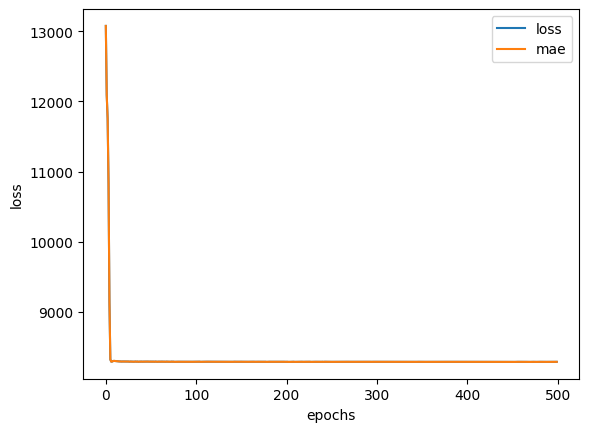

In [124]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

🤔 **Questions:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before. So TensorFlow has a solution. It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

Let's start by looking at the units and distribution of our data pre-normalization.

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [125]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: ylabel='Frequency'>

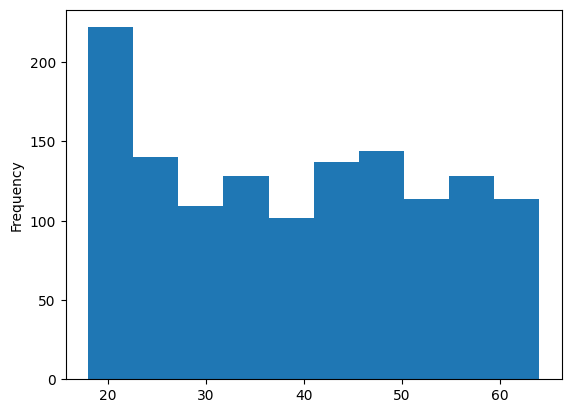

In [126]:
X['age'].plot(kind="hist")

<Axes: ylabel='Frequency'>

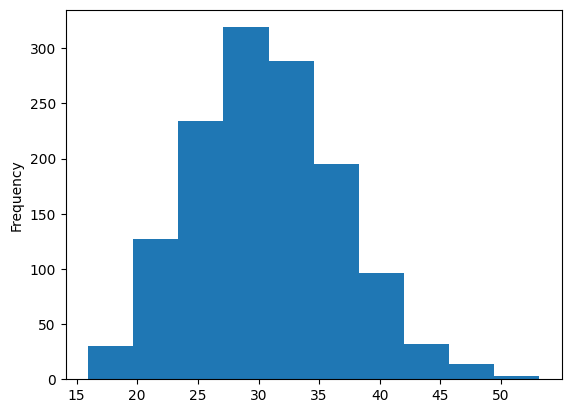

In [127]:
X["bmi"].plot(kind="hist")

In [128]:
X["children"].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


**Feature Scaling**

Scaling type | What it does | Scikit-Learn function | When to use
:-- | :-- | :-- | :--
Scale (also referred to as normalization | Converts all values to between 0 and 1 while preserving the original distribution | `MinMaxScaler` | Use as default scaler with neural networks.
Standardization | Removes the mean and divides each value by the standard deviation | `StandardScaler` | Transform a feature to have close to normal distribution (caution: this reduces the effect of outliers).


📖 **Resource:** [Scale, Standardize, or Normalize with Scikit-Learn by Jeff Hale](https://medium.com/data-science/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [130]:
# Let's restart where everything can be run from here and below
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance DataFrame
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

In [131]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [132]:
# What does our data look like now?
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [138]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [139]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Our data has been normalized and one-hot-encoded. Now let's build a neural network model on it and see how it goes.

In [140]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Build the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13297.9082 - mae: 13297.9082
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13291.2920 - mae: 13291.2920
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13275.2002 - mae: 13275.2002
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13239.5762 - mae: 13239.5762
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13172.8018 - mae: 13172.8018
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13063.1689 - mae: 13063.1689
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12899.6523 - mae: 12899.6523
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12672.0068 - mae: 12672.0068
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12370.3926 - mae: 12370.3926
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11986.6885 - mae: 11986.6885
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11527.4512 - mae: 11527.4512
Epoch 12/100
34/34 ━━━━━━━━━━━

In [141]:
# Evaluate the model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3516.0098 - mae: 3516.0098  


[3430.13916015625, 3430.13916015625]